<a href="https://colab.research.google.com/github/munich-ml/MLPy2021/blob/main/32_evaluate_fMNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

## References
Resources used to create this notebook:
- [scikit-learn website](https://scikit-learn.org)
- [Matplotlib website](https://matplotlib.org/)
- [Wikipedia](https://en.wikipedia.org/wiki/Main_Page)
- Hands-on Machine Learning with Scikit-learn, Keras & TensorFlow, Aurelien Geron, [Book on Amazon](https://www.amazon.de/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_3?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=Hands-on+Machine+Learning+with+Scikit-learn%2C+Keras+%26+TensorFlow%2C+Aurelien+Geron%2C&qid=1589875241&sr=8-3)
- Introduction to Machine Learning with Python, Andreas Mueller, [Book on Amazon](https://www.amazon.de/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)


## Setup

First, do the common imports.

Tensorflow must be 2.x, because there are major changes from 1.x

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Forces tensorflow version (only in colab)
%tensorflow_version 2.x           

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import os
import numpy as np
import pandas as pd
from IPython.display import Image

# to make this notebook's output stable across runs
np.random.seed(42)

# Setup matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get munich-ml helper functions from GitHub
if "MLPy2020" in os.listdir():
    !git -C MLPy2020 pull
else:
    !git clone https://github.com/munich-ml/MLPy2020/

from MLPy2020.MLPy_helper_funcs import plot_confusion_matrix, plot_prediction_examples, pickle_in

Cloning into 'MLPy2020'...
remote: Enumerating objects: 334, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 334 (delta 62), reused 4 (delta 2), pack-reused 218
Receiving objects: 100% (334/334), 6.17 MiB | 13.36 MiB/s, done.
Resolving deltas: 100% (178/178), done.


# Load a model

## Mount google drive

In [2]:
mount_dir = os.path.join(os.getcwd(), "drive")
mount_dir

'/content/drive'

In [3]:
from google.colab import drive
drive.mount(mount_dir)

Mounted at /content/drive


## load_model()



In [4]:
save_dir = os.path.join(mount_dir, "My Drive", "Colab Notebooks", "models")
os.listdir(save_dir)

['fMNIST_CNN_v3_ageron.h5',
 'fMNIST_CNN_v3_ageron_data.pkl',
 'fMNIST_CNN_v6_cmasch_mod.h5',
 'fMNIST_CNN_v6_cmasch_mod_data.pkl',
 'fMNIST_CNN_v6_cmasch_overfitted.h5',
 'fMNIST_CNN_v6_cmasch_overfitted_data.pkl',
 'fMNIST_CNN_v7_cmasch_SGD_100epochs.h5',
 'fMNIST_CNN_v7_cmasch_SGD_100epochs_data.pkl',
 'fMNIST_NN_v2_ageron.h5',
 'fMNIST_NN_v2_ageron_data.pkl',
 'fMNIST_CNN_v6_cmasch.h5',
 'fMNIST_CNN_v6_cmasch_data.pkl',
 'fMNIST_NN_v1_ageron.h5',
 'fMNIST_NN_v1_ageron_data.pkl']

In [5]:
fn = "fMNIST_NN_v1_ageron"	
model = keras.models.load_model(os.path.join(save_dir, fn + ".h5"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Load the validation and test data

In [6]:
print([var for var in vars() if not var.startswith("_")])

['In', 'Out', 'get_ipython', 'exit', 'quit', 'sys', 'tf', 'keras', 'os', 'np', 'pd', 'Image', 'mpl', 'plt', 'warnings', 'plot_confusion_matrix', 'plot_prediction_examples', 'pickle_in', 'mount_dir', 'drive', 'save_dir', 'fn', 'model']


In [8]:
pickle_in(os.path.join(save_dir, fn+'_data.pkl'), locals())

pickle_in: Updating scope with the following variables:
['X_test', 'y_test', 'class_names', 'X_valid', 'y_valid']


In [9]:
print([var for var in vars() if not var.startswith("_")])

['In', 'Out', 'get_ipython', 'exit', 'quit', 'sys', 'tf', 'keras', 'os', 'np', 'pd', 'Image', 'mpl', 'plt', 'warnings', 'plot_confusion_matrix', 'plot_prediction_examples', 'pickle_in', 'mount_dir', 'drive', 'save_dir', 'fn', 'model', 'X_test', 'y_test', 'class_names', 'X_valid', 'y_valid']


In [10]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

# Evaluate the model


###model.evaluate()


`model.evaluate()` predicts restults on the testset and computes loss and metrics with respect to the expected results  

In [13]:
model.evaluate(X_valid, y_valid);

157/157 [==============================] - 1s 1ms/step - loss: 0.2955 - accuracy: 0.8972


### model.predict()

In [14]:
pd.options.display.float_format = '{:,.2f}'.format

In [15]:
y_proba = model.predict(X_valid[:5])
pd.DataFrame(y_proba, columns=class_names).T

,0,1,2,3,4
T-shirt,0.00,1.00,0.42,0.05,0.17
Trouser,0.00,0.00,0.01,0.00,0.04
Pullover,0.00,0.00,0.02,0.00,0.00
Dress,0.00,0.00,0.28,0.89,0.76
Coat,0.00,0.00,0.03,0.00,0.00
Sandal,0.00,0.00,0.00,0.00,0.00
Shirt,0.00,0.00,0.24,0.06,0.03
Sneaker,0.00,0.00,0.00,0.00,0.00
Bag,0.00,0.00,0.00,0.00,0.00
Ankle boot,1.00,0.00,0.00,0.00,0.00


### model.predict_classes()

In [16]:
y_pred = model.predict_classes(X_valid)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 0, 0, ..., 5, 8, 3])

In [17]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'T-shirt', 'T-shirt', ..., 'Sandal', 'Bag', 'Dress'],
      dtype='<U10')

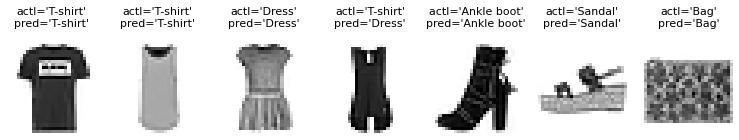

In [18]:
some_indexes = [1, 2, 3, 4, 11, 12, 23]
plt.figure(figsize=(13, 2.5))
for col, index in enumerate(some_indexes):
    plt.subplot(1, len(some_indexes), col+1)
    plt.imshow(np.squeeze(X_valid[index]), cmap="binary")
    title = "actl='{}'\n".format(class_names[y_valid[index]])
    title +="pred='{}'\n".format(class_names[y_pred[index]])
    plt.title(title, fontsize=11), plt.axis('off')

## Confusion matrix

A confusion matrix is a two dimensional histogram of actual (rows) and predicted (cols) classes. 
- the main diagonal are correct predictions
- all other entries are fails

In [19]:
confusion = tf.math.confusion_matrix(y_valid, y_pred)
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[401,   2,   5,  14,   1,   1,  29,   0,   4,   0],
       [  0, 544,   1,   9,   0,   0,   2,   0,   0,   0],
       [ 13,   0, 404,   4,  61,   1,  20,   0,   1,   0],
       [  5,   0,   4, 468,  14,   0,   9,   0,   1,   0],
       [  0,   0,  28,  16, 428,   0,  14,   0,   2,   0],
       [  0,   0,   0,   0,   0, 469,   0,  15,   2,   7],
       [ 77,   0,  36,  14,  48,   0, 312,   1,   5,   0],
       [  0,   0,   0,   0,   0,   4,   0, 496,   1,  11],
       [  3,   1,   0,   3,   2,   1,   2,   2, 474,   2],
       [  0,   0,   0,   0,   0,   1,   0,  13,   2, 490]], dtype=int32)>

###Exercise 
Previously, we computed the **accurary** using `model.evaluate()`. Accuracy is defined by:

$
\text{accuracy} = \cfrac{\text{all}True}{\text{all}} 
$ 

Check that result with the confusion matrix supported by **numpy**.


Hint: The follwing line converts the **tensor** `confusion` into a **numpy array** and computes the sum of all items.
```python
np.array(confusion).sum()
```



### Plotting the confusion matrix

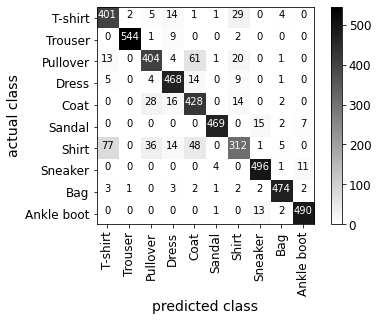

In [21]:
plot_confusion_matrix(confusion, xticks=class_names, yticks=class_names)

Interpretation of the confusion matrix?

One usually focusses on the **false predictions**, thus ignoring the main diagonal may improve the visualization:

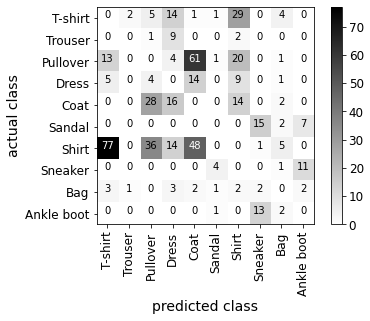

In [22]:
plot_confusion_matrix(confusion, xticks=class_names, yticks=class_names, ignore_main_diagonal=True)

## Other performance measures for classifiers

*Accuracy* is a good measure for symmetric datasets. If the counts of *false negatives* greatly differ from the *false positives* of if their costs is greatly different, alternative performance measures are required:

### Precision
Precision (ideally 1.0) is decreased by **false positives** (FP). FP means the prediction `True` is wrong.

$
\text{precision} = \cfrac{TP}{\text{all}P} = \cfrac{TP}{TP + FP}
$

Example application: *Email Spam Detection*
FP (mail sorted out) is worse than FN (spam coming through)


### Recall (or sensitivity)
Recall (ideally 1.0) says how good a model is at detecting the positives. 

Recall is decreased by **false negatives** (FN). FN means the prediction `False` is wrong.

$
\text{recall} = \cfrac{TP}{\text{all}T} = \cfrac{TP}{TP + FN}
$

Example application: *Medical Diabetic Detection*

FN (Diabetic not detected) is worse than FP (Diabetic detected but patient is healthy)


### Specificity 
Specificity says how good a model is at detecting the negatives (avoiding false alarms).
$
\text{specificity} = \cfrac{TN}{\text{all}N} = \cfrac{TN}{TN + FP}
$

### Example application: *Digit 5 detector*

Is the digit a '5' or not?


![split_train_test.png](https://github.com/munich-ml/MLPy2021/blob/main/images/precision-recall.png?raw=1)

### F1-score
*Harmonic mean* of precision and recall. 

$
F_1 = \cfrac{2}{{precision^{-1}} + {recall^{-1}}} = 2 \times \cfrac{\text{precision}\, \times \, \text{recall}}{\text{precision}\, + \, \text{recall}} 
$

Whereas *regular mean* treats all values equally, the *harmonic mean* gives more weight to low values.

## Classification report of the model
using precision, recall, an F1-score

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt       0.78      0.91      0.84       457
     Trouser       0.99      0.99      0.99       556
    Pullover       0.82      0.80      0.81       504
       Dress       0.88      0.92      0.90       501
        Coat       0.75      0.88      0.81       488
      Sandal       0.97      0.98      0.97       493
       Shirt       0.85      0.56      0.67       493
     Sneaker       0.95      0.96      0.95       512
         Bag       0.96      0.97      0.96       490
  Ankle boot       0.97      0.95      0.96       506

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



### Exercise 
Check the *precision* and *recall* values returned by `classification_report()` for one class (e.g. 'Coat')


####Solution

In [ ]:
CLASS_LABEL = "Coat"
idx = class_names.index(CLASS_LABEL)
idx

4

In [ ]:
cm = np.array(confusion)
cm

array([[414,   2,   4,  14,   2,   1,  17,   0,   3,   0],
       [  0, 548,   1,   7,   0,   0,   0,   0,   0,   0],
       [  9,   0, 402,   7,  67,   1,  16,   1,   1,   0],
       [ 11,   2,   4, 459,  16,   0,   7,   0,   2,   0],
       [  0,   0,  32,  16, 431,   0,   8,   0,   1,   0],
       [  0,   0,   0,   0,   0, 484,   0,   6,   0,   3],
       [ 96,   2,  46,  13,  53,   0, 275,   1,   7,   0],
       [  0,   0,   0,   0,   0,   9,   0, 491,   2,  10],
       [  4,   0,   1,   3,   2,   1,   0,   2, 474,   3],
       [  0,   0,   0,   0,   0,   4,   0,  18,   3, 481]], dtype=int32)

In [ ]:
tp = cm[idx, idx]
tp

431

FP are all predicted as "CLASS_LABEL" minus TP

In [ ]:
all_positive_predictions = cm[:, idx].sum()
fp = all_positive_predictions - tp
fp

140

FN are all actial "CLASS_LABEL" items minus TP

In [ ]:
fn = cm[idx, :].sum() - tp
fn

57

In [ ]:
print("Class '{}': precision={:.2f}, recall={:.2f}".format(CLASS_LABEL, tp/(tp+fp), tp/(tp+fn)))

Class 'Coat': precision=0.75, recall=0.88


## Examples of predictions


Let's look at some examples of right and wrong predictions.

In [ ]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Evaluating examples of test_class=6, 'Shirt'
- true pos: 275 images
- true neg: 4459 images
- false pos: 48 images
- false neg: 218 images


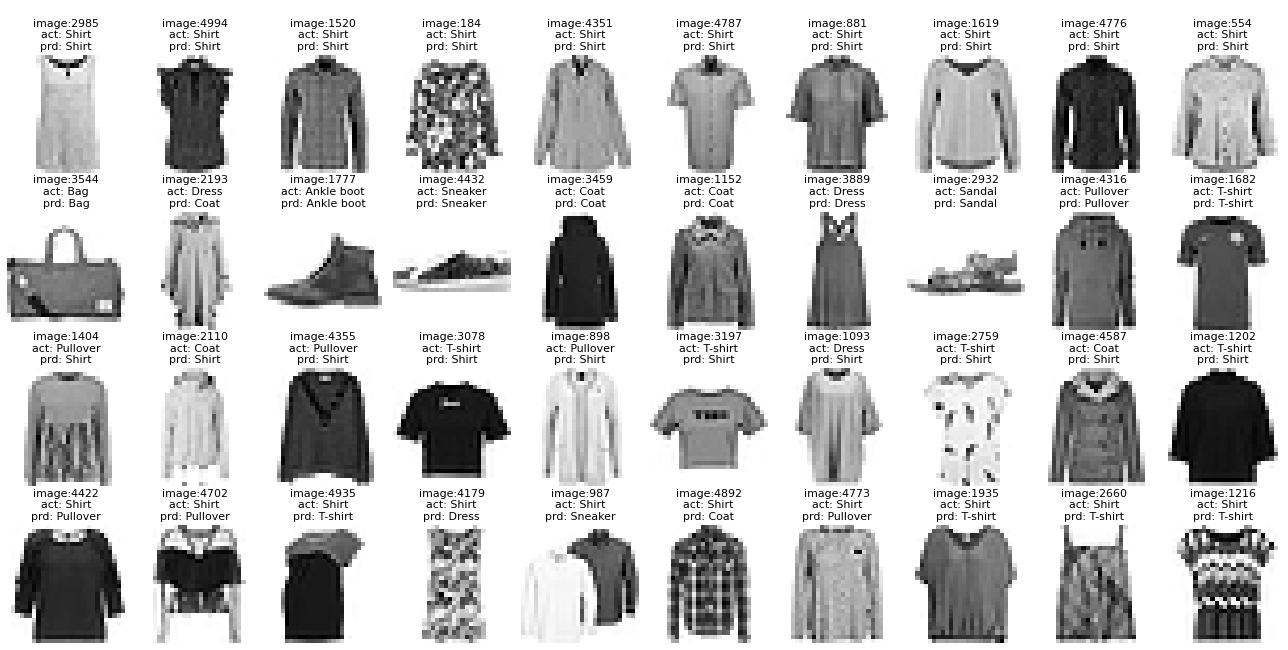

In [ ]:
validation_class = 6
plot_prediction_examples(validation_class, class_names, y_pred, y_valid, X_valid)